<a href="https://colab.research.google.com/github/ibnuhibbann/sentimen-analysis-naive-bayes/blob/main/Kelompok_4_Analisa_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load Data

In [ ]:
import csv
import nltk
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from nltk.corpus import stopwords


nltk.download('stopwords')
drive.mount('/content/drive')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mounted at /content/drive


In [ ]:
# Membuka file CSV
df = pd.read_csv('/content/drive/MyDrive/Analisa Sentimen/data.csv')
df.head()

,Author,Time,Likes,Comment
0,@rangga466,2023-12-26T07:45:05Z,0,"Udah keren,cerdas apalagi yg kurang dari pa An..."
1,@aprilliadwi7073,2023-12-26T07:39:12Z,0,Sosok seperti pak anies lah yang dicari menjad...
2,@rasamalabayan,2023-12-26T07:36:38Z,0,"Saya dukung pak anies, solid dukung AMIN, kine..."
3,@Agilannaba,2023-12-26T07:32:34Z,0,Pak Anies sudah tidak diragukan lagi kepemimpi...
4,@RinduBaitullah2,2023-12-26T07:31:13Z,0,rekam jejak anis saat jadi gubernur jakarta te...


In [ ]:
# menyeleksi 1 kolom didalam csv
df = df[['Comment']]
# df = df[~df['Comment'].str.contains('ganjar|prabowo|wowo', case=False)] # data anis
# df = df[~df['Comment'].str.contains('anis|anies|ganjar|amin|mahfud', case=False)] #data prabowo
# df = df[~df['Comment'].str.contains('anis|anies|amin|prabowo|wowo|gibran', case=False)] #data ganjar
df

,Comment
0,"Udah keren,cerdas apalagi yg kurang dari pa An..."
1,Sosok seperti pak anies lah yang dicari menjad...
2,"Saya dukung pak anies, solid dukung AMIN, kine..."
3,Pak Anies sudah tidak diragukan lagi kepemimpi...
4,rekam jejak anis saat jadi gubernur jakarta te...
...,...
494,Depat calon presiden 2024 sebagai gambaran ma...
495,Pasangan capres dan cawapres AMIN adalah cermi...
496,"Tidak adanya keadilan, harus diadakan dialog.\..."
497,Hanya pasangan AMIN cerminan pemimpin masa dep...


# 1. Cleaning Data

In [ ]:
# memeriksa ukuran tabel
df.shape

(499, 1)

In [ ]:
# menghapus duplicated entry di kolom comment
df = df.drop_duplicates(subset=['Comment'])

In [ ]:
# mengecek jumlah duplikasi
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
# memeriksa total entry yang duplikat
# menjumlahkan total duplikasi
df.isnull().sum()

Comment    0
dtype: int64

In [ ]:
df.shape

(492, 1)

In [ ]:
# filter data
def clean_twitter_text(text):
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  text = re.sub(r"(\s+)"," ", text).strip()

  return text

df['Comment'] = df['Comment'].apply(clean_twitter_text)

In [ ]:
# mengubah tiap kata menjadi huruf kecil (lower case)
df['Comment'] = df['Comment'].str.lower()
df

,Comment
0,udah kerencerdas apalagi yg kurang dari pa ani...
1,sosok seperti pak anies lah yang dicari menjad...
2,saya dukung pak anies solid dukung amin kinerj...
3,pak anies sudah tidak diragukan lagi kepemimpi...
4,rekam jejak anis saat jadi gubernur jakarta te...
...,...
494,depat calon presiden 2024 sebagai gambaran mas...
495,pasangan capres dan cawapres amin adalah cermi...
496,tidak adanya keadilan harus diadakan dialogtap...
497,hanya pasangan amin cerminan pemimpin masa dep...


# 2. Preprosesing

*   Normalisasi
*   Stopword
*   Tokenize
*   Stemming

In [ ]:
# Normalisasi
norm = {'yg' : 'yang' , 'nggak' : 'tidak', 'knapa' : 'kenapa'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['Comment'] = df['Comment'].apply(lambda x: normalisasi(x))
df

,Comment
0,udah kerencerdas apalagi yang kurang dari pa a...
1,sosok seperti pak anies lah yang dicari menjad...
2,saya dukung pak anies solid dukung amin kinerj...
3,pak anies sudah tidak diragukan lagi kepemimpi...
4,rekam jejak anis saat jadi gubernur jakarta te...
...,...
494,depat calon presiden 2024 sebagai gambaran mas...
495,pasangan capres dan cawapres amin adalah cermi...
496,tidak adanya keadilan harus diadakan dialogtap...
497,hanya pasangan amin cerminan pemimpin masa dep...


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover (new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['Comment'] = df['Comment'].apply(lambda x: stopword(x))
df.head()

,Comment
0,udah kerencerdas kurang pa anis bukti kepemimp...
1,sosok pak anies lah dicari menjadi pemimpin in...
2,dukung pak anies solid dukung amin kinerja nya...
3,pak anies tidak diragukan kepemimpinannya sela...
4,rekam jejak anis jadi gubernur jakarta terbila...


In [ ]:
# Tokenize
tokenized = df['Comment'].apply(lambda x:x.split())
tokenized

0      [udah, kerencerdas, kurang, pa, anis, bukti, k...
1      [sosok, pak, anies, lah, dicari, menjadi, pemi...
2      [dukung, pak, anies, solid, dukung, amin, kine...
3      [pak, anies, tidak, diragukan, kepemimpinannya...
4      [rekam, jejak, anis, jadi, gubernur, jakarta, ...
                             ...                        
494    [depat, calon, presiden, 2024, gambaran, masya...
495    [pasangan, capres, cawapres, amin, cerminan, m...
496    [adanya, keadilan, diadakan, dialogtapi, didal...
497    [pasangan, amin, cerminan, pemimpin, masa, dep...
498    [pasangan, amin, pemimpin, ditunggu, rakyat, j...
Name: Comment, Length: 492, dtype: object

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/Analisa Sentimen/data_stemming_500.csv", index=False)
data = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/data_stemming_500.csv", encoding='latin1')

aku cium bau2 vicky prasetyo sini
aaminnn
atharuddin
penting pilih pimpin cerdas lugas sampai aspirasi solusipaling gak situ kasih gambar bagaimana cepat tepat pikir kritis beliau hadap masalah negara tenang sabar hadap oposisiat least we can judge by how quick his reasonable thinking pimpin cerdas harap kasih kontribusi ide2 jadi gak cuma blong ikut arus ajasemoga pak anis tunjuk moralitas pimpin baik jadi presiden nanti amiin
anis ngomong apa sih ngak solusi sama sekali sama kek dengerin viky prasetyo ngomong
terima kasih pak anis suara fenomena ordal indonesia amat pedih pak kami tak darah biru kilap untuk juang hak
gakseru komentar hhmmm
lah yak capres emosi gitu kata ga butuh jabat santai aja paaak kl ga butuh jabat ngapah jadi emosi dah jadi ga respek sorry ye sorry yee
udah capek ngelike amin kan gak buzzer jd suka haticukup like segitu aja biar bukti pas hisab allah kalo masuk orang pikir tonton dengar video habis lalu pilih tetap amin sesuai komando ulama benar sekali tiga tet

# 3. Translate

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/data_stemming_500.csv", encoding='latin1')
data.head()

,Comment
0,aku cium bau2 vicky prasetyo sini
1,aaminnn
2,atharuddin
3,penting pilih pimpin cerdas lugas sampai aspir...
4,anis ngomong apa sih ngak solusi sama sekali s...


In [ ]:
# translate data yang telah di stemming menjadi bahasa inggris
from translate import Translator
def convert_eng(tweet):
  translator = Translator(to_lang="en", from_lang="id")
  translation = translator.translate(tweet)
  return translation

data['english'] = data['Comment'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/Analisa Sentimen/data_terjemahan_500.csv")

# 4. Labeling

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/data_terjemahan_500.csv", index_col=0)
data

,Comment,tweet_english
0,udah kerencerdas kurang pa anis bukti pimpin u...,already kerencerdar less pa anis proof pimpin ...
1,sosok pak anies lah cari jadi pimpin indonesia...,the figure of Pak Anies is looking for so the ...
2,dukung pak anies solid dukung amin kerja nya s...,support sir anies solid support his work amen ...
3,pak anies tidak ragu pimpin selalu beri ubah i...,pak anies no doubt pimpin always give change i...
4,rekam jejak anis jadi gubernur jakarta bilang ...,anis's track record so the governor of jakarta...
...,...,...
487,depat calon presiden 2024 gambar masyarakat in...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
488,pasang capres cawapres amin cermin masa depan ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
489,ada adil ada dialogtapi dalam dialog pasti tun...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
490,pasang amin cermin pimpin masa depan buat indo...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [ ]:
# data = data[~data['Comment'].str.contains('ganjar|prabowo|wowo', case=False)] # data anis
# data = data[~data['Comment'].str.contains('anis|anies|ganjar|amin|mahfud', case=False)] #data prabowo
# data = data[~data['Comment'].str.contains('anis|anies|amin|prabowo|wowo|gibran', case=False)] #data ganjar

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install nltk
!pip install wordcloud

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Proses Labelling data kolom english
data_tweet = list(data['tweet_english'])
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob (tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data: \nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')



Hasil Analisis Data: 
Positif = 453
Netral = 17
Negatif = 22

Total Data: 492


labeling text blob

In [ ]:
data['klasifikasi'] = status
data

# data.to_csv('/content/drive/MyDrive/Analisa Sentimen/sentiment_label.csv', index=False)

,Comment,tweet_english,klasifikasi
0,udah kerencerdas kurang pa anis bukti pimpin u...,already kerencerdar less pa anis proof pimpin ...,Positif
1,sosok pak anies lah cari jadi pimpin indonesia...,the figure of Pak Anies is looking for so the ...,Negatif
2,dukung pak anies solid dukung amin kerja nya s...,support sir anies solid support his work amen ...,Netral
3,pak anies tidak ragu pimpin selalu beri ubah i...,pak anies no doubt pimpin always give change i...,Positif
4,rekam jejak anis jadi gubernur jakarta bilang ...,anis's track record so the governor of jakarta...,Positif
...,...,...,...
487,depat calon presiden 2024 gambar masyarakat in...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
488,pasang capres cawapres amin cermin masa depan ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
489,ada adil ada dialogtapi dalam dialog pasti tun...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
490,pasang amin cermin pimpin masa depan buat indo...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


# 5. Visualisasi

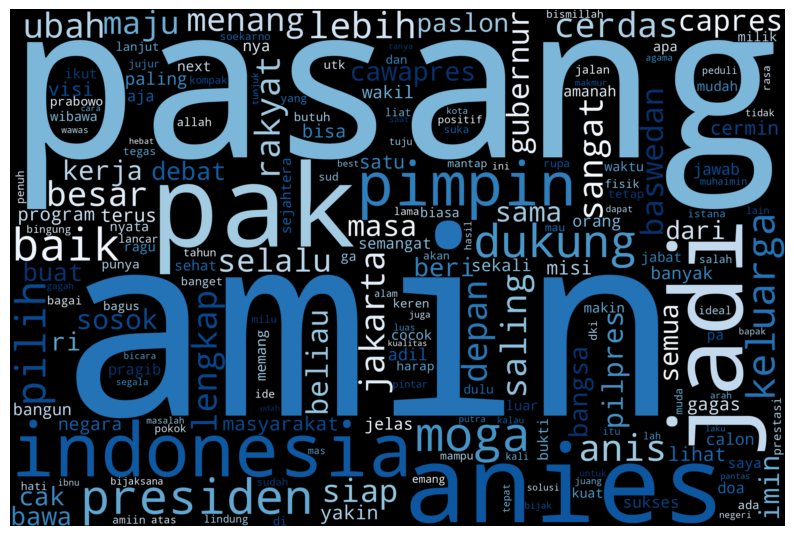

In [ ]:
# Wordcloud All Comment
from wordcloud import WordCloud, STOPWORDS

def plot_cloud (wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud,
    interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['Comment']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud (wordcloud)

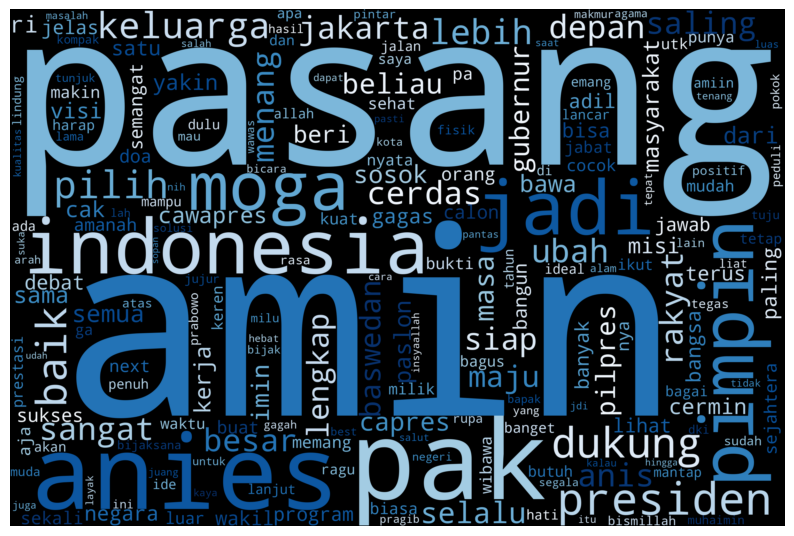

In [ ]:
# Wordcloud Positif
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Filter rows where 'klasifikasi' column is 'Positif'
positive_data = data[data['klasifikasi'] == 'Positif']

# Join all tweets from the filtered data
all_words = ' '.join([tweets for tweets in positive_data['Comment']])

# Create a set of stopwords
# stopwords = set(STOPWORDS)

# Add 'anies' to the set of stopwords
# stopwords.add('anies')

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

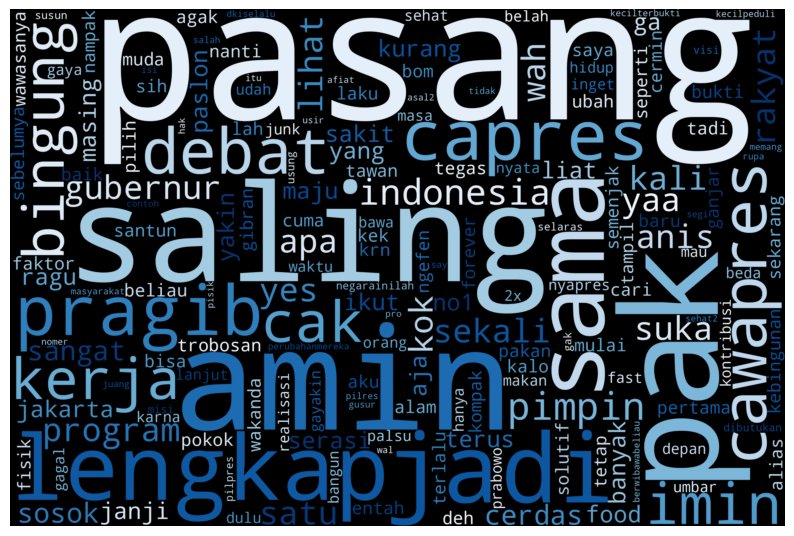

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Filter rows where 'klasifikasi' column is 'Negatif'
positive_data = data[data['klasifikasi'] == 'Negatif']

# Join all tweets from the filtered data
all_words = ' '.join([tweets for tweets in positive_data['Comment']])

# # Create a set of stopwords
# stopwords = set(STOPWORDS)

# # Add 'anies' to the set of stopwords
# stopwords.add('anies')

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=stopwords
).generate(all_words)

plot_cloud(wordcloud)


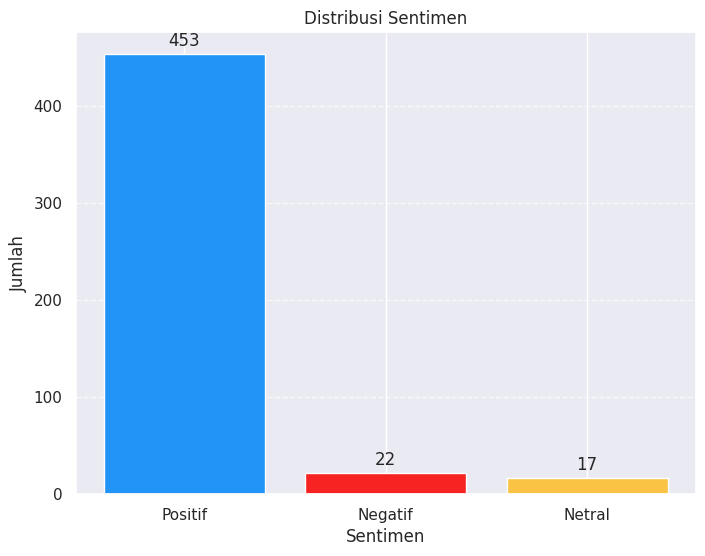

In [ ]:
# Jumlah Sentimen
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(label, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343',])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")


# 6. Klaisifikasi Sentimen (Naive Bayes Classifier)

In [ ]:
data

,Comment,tweet_english,klasifikasi
0,udah kerencerdas kurang pa anis bukti pimpin u...,already kerencerdar less pa anis proof pimpin ...,Positif
1,sosok pak anies lah cari jadi pimpin indonesia...,the figure of Pak Anies is looking for so the ...,Negatif
2,dukung pak anies solid dukung amin kerja nya s...,support sir anies solid support his work amen ...,Netral
3,pak anies tidak ragu pimpin selalu beri ubah i...,pak anies no doubt pimpin always give change i...,Positif
4,rekam jejak anis jadi gubernur jakarta bilang ...,anis's track record so the governor of jakarta...,Positif
...,...,...,...
487,depat calon presiden 2024 gambar masyarakat in...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
488,pasang capres cawapres amin cermin masa depan ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
489,ada adil ada dialogtapi dalam dialog pasti tun...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
490,pasang amin cermin pimpin masa depan buat indo...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


In [ ]:
dataset = data.drop(['Comment'], axis=1, inplace=False)

# dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)


set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
akurasi = cl.accuracy(dataset)

# Mengubah akurasi menjadi persentase
akurasi_persen = round(akurasi * 100)

print("Akurasi Test: ", akurasi)
print("Akurasi Test: ", akurasi_persen,"%")


Akurasi Test:  0.7540650406504065
Akurasi Test:  75 %


In [ ]:
# Labeling Hasil Training tweet_english
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 350
Netral = 31
Negatif = 111

Total Data : 492


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

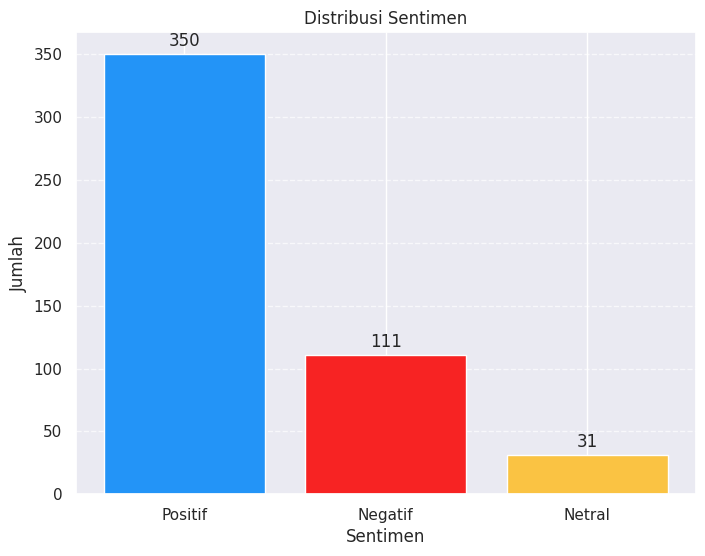

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(label, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343',])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")


In [ ]:
data

,Comment,tweet_english,klasifikasi,klasifikasi_bayes
0,udah kerencerdas kurang pa anis bukti pimpin u...,already kerencerdar less pa anis proof pimpin ...,Positif,Negatif
1,sosok pak anies lah cari jadi pimpin indonesia...,the figure of Pak Anies is looking for so the ...,Negatif,Negatif
2,dukung pak anies solid dukung amin kerja nya s...,support sir anies solid support his work amen ...,Netral,Negatif
3,pak anies tidak ragu pimpin selalu beri ubah i...,pak anies no doubt pimpin always give change i...,Positif,Negatif
4,rekam jejak anis jadi gubernur jakarta bilang ...,anis's track record so the governor of jakarta...,Positif,Negatif
...,...,...,...,...
487,depat calon presiden 2024 gambar masyarakat in...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
488,pasang capres cawapres amin cermin masa depan ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
489,ada adil ada dialogtapi dalam dialog pasti tun...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
490,pasang amin cermin pimpin masa depan buat indo...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
  if len(n) >= 4:
    if n[2] != n[3]:
      print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
      print("Tuple tidak memiliki cukup elemen.")

Text: udah kerencerdas kurang pa anis bukti pimpin udah jelas dijakarta wkt jadi gubernur jis diri megah jadi bangga nasional banyak spot2 selfy buat masyarakat jakartapokoknya anis lah yang cocok jd pimpin ri
Classifier: Positif
Classifier Bayes: Negatif 

Tuple tidak memiliki cukup elemen.
Text: dukung pak anies solid dukung amin kerja nya sdh bukti jakarta
Classifier: Netral
Classifier Bayes: Negatif 

Text: pak anies tidak ragu pimpin selalu beri ubah indonesia lebih baij
Classifier: Positif
Classifier Bayes: Negatif 

Text: rekam jejak anis jadi gubernur jakarta bilang sukses doa semua pak anis sukses pilpres 2024
Classifier: Positif
Classifier Bayes: Negatif 

Text: biaya partai politik jadi masalah kalau ada biaya mana dapat biaya
Classifier: Netral
Classifier Bayes: Negatif 

Tuple tidak memiliki cukup elemen.
Text: pak anies sosok pimpin sangat pantas pimpin negara indonesia beliau cerdas bahkan banyak harga beliau saat jadi gubernur
Classifier: Positif
Classifier Bayes: Negat